# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [43]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import glob
from shutil import copyfile
import os

%matplotlib inline

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [44]:
!ls /data/TrainingSet

images	labels


In [45]:
!ls -ltr /data/TrainingSet/images | head 

total 108116
-rw-r--r-- 1 root root    92968 Jan 29  2020 hippocampus_367.nii.gz
-rw-r--r-- 1 root root    79147 Jan 29  2020 hippocampus_304.nii.gz
-rw-r--r-- 1 root root  9811232 Jan 29  2020 hippocampus_281.nii.gz
-rw-r--r-- 1 root root    66445 Jan 29  2020 hippocampus_216.nii.gz
-rw-r--r-- 1 root root    85266 Jan 29  2020 hippocampus_204.nii.gz
-rw-r--r-- 1 root root    72649 Jan 29  2020 hippocampus_375.nii.gz
-rw-r--r-- 1 root root    75921 Jan 29  2020 hippocampus_316.nii.gz
-rw-r--r-- 1 root root    58442 Jan 29  2020 hippocampus_308.nii.gz
-rw-r--r-- 1 root root    66494 Jan 29  2020 hippocampus_279.nii.gz


In [46]:
!ls -ltr /data/TrainingSet/labels | head 

total 1072
-rw-r--r-- 1 root root  1161 Jan 29  2020 hippocampus_367.nii.gz
-rw-r--r-- 1 root root   920 Jan 29  2020 hippocampus_316.nii.gz
-rw-r--r-- 1 root root  1013 Jan 29  2020 hippocampus_304.nii.gz
-rw-r--r-- 1 root root   886 Jan 29  2020 hippocampus_204.nii.gz
-rw-r--r-- 1 root root   959 Jan 29  2020 hippocampus_375.nii.gz
-rw-r--r-- 1 root root   835 Jan 29  2020 hippocampus_343.nii.gz
-rw-r--r-- 1 root root   893 Jan 29  2020 hippocampus_308.nii.gz
-rw-r--r-- 1 root root   758 Jan 29  2020 hippocampus_279.nii.gz
-rw-r--r-- 1 root root  1228 Jan 29  2020 hippocampus_243.nii.gz
ls: write error: Broken pipe


In [47]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
training_path = '/data/TrainingSet/'

# TODO Do we want to use this method?
image = nib.load(training_path + 'images/hippocampus_304.nii.gz').get_fdata()
label = nib.load(training_path + 'labels/hippocampus_304.nii.gz').get_fdata()

In [48]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:

# TODO does this look like what we expected... The resolution is not so hot. 
# TODO let's do this with a mosaic
# plt.rcParams["figure.figsize"] = (10,10)

# First off, how many slices are we dealing with here? Addressing the following question:
# Q. 'What are the dimensions of the input arrays?'
image.shape

(36, 48, 38)

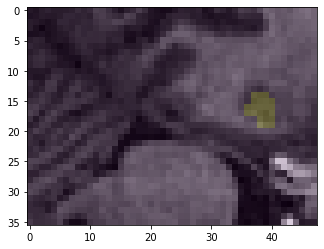

In [49]:
# Test plot one
plt.imshow(image[:,:,5], cmap="gray", origin='lower', alpha=1)
plt.imshow(label[:,:,5], alpha=0.2)

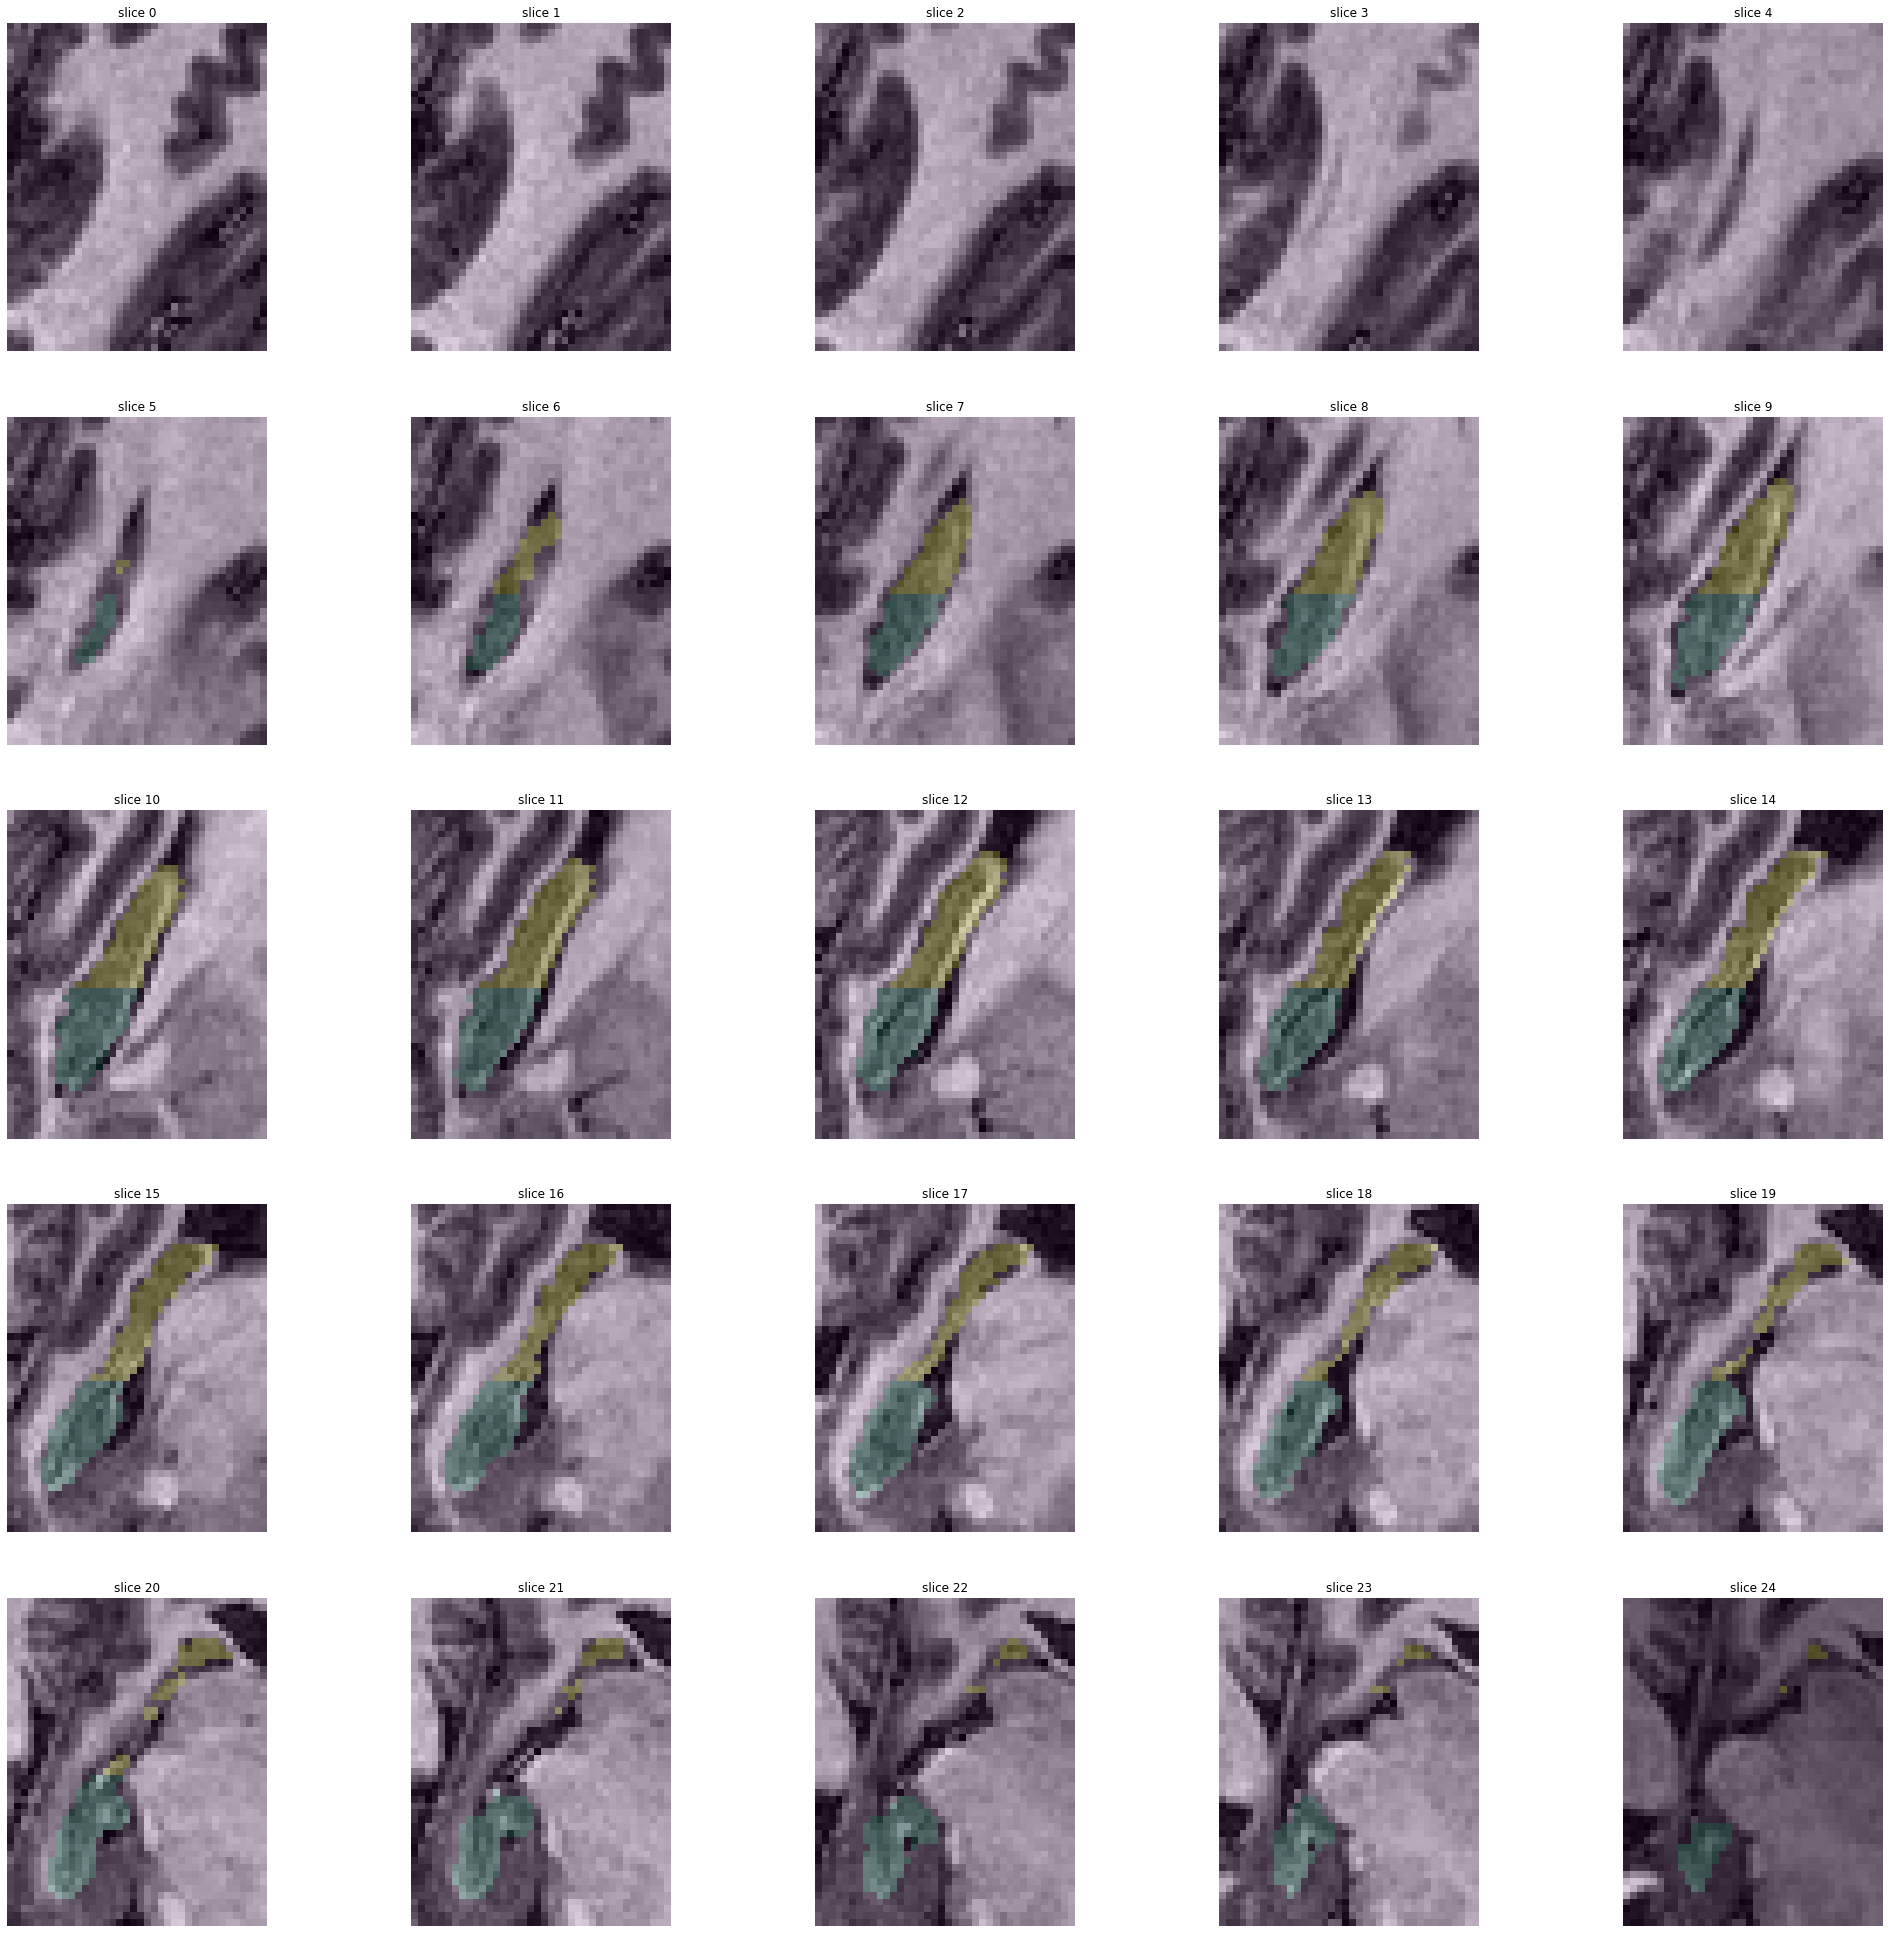

In [50]:
# Now let's review a range, adapting a function covered in previous exercises

def display_volume_slices(img, lab, w, h):
    plot_w = w
    plot_h = h

    # You can play with figsize parameter to adjust how large the images are
    fig, ax = plt.subplots(plot_h, plot_w, figsize=[35,35])

    for i in range(plot_w*plot_h):
        plt_x = i % plot_w
        plt_y = i // plot_w
        if (i < len(img)):
            ax[plt_y, plt_x].set_title(f"slice {i}")
            ax[plt_y, plt_x].imshow(img[i], cmap='gray')
            ax[plt_y, plt_x].imshow(lab[i], alpha=0.2)
        ax[plt_y, plt_x].axis("off")

    plt.show()

display_volume_slices(image, label, 5, 5)

Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [51]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

Let's start by ensuring we can replicate the above view. **Note the elaboration to show the labels as different colors**
![](full_window.png)

Looks fine. Now, a closer look at one of the reconstructions.
![](reconstruction.png)

And an animation of this reconstruction
![](reconstruction_animation.gif)

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [52]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

# Note that I loaded images, pulling array values _directly_. Small modification to get back to images
raw_image = nib.load(training_path + 'images/hippocampus_304.nii.gz')

raw_image.header_class() # Confirmed

# Note for later: further documenation, here: https://nipy.org/nibabel/nibabel_images.html

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [53]:
# TASK: How many bits per pixel are used?

# In general, this is going to return too much information... Methods to suset, below
print(raw_image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 36 48 38  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [

In [54]:
# TODO quick sanity check before I go further: are there different images across this series?
# I think I was asking about image _size_

# Load a few more and check.

In [55]:
# Updating the above with a method to extract more specific entries from the header
print("Bits per pixel: ", raw_image.header["bitpix"])

Bits per pixel:  32


In [56]:
# TASK: What are the units of measurement?

# Units appear to be encoded wihtin `xyzt_units`  
print("Units, as binary: ", bin(int(raw_image.header["xyzt_units"]))[2:])
print("Units, interpreting base 2 binary from the table specified in documentation: millimeters")

# FOLLOW-UP CONFIRMATION: there appears to be a method to extract the specific units (here, we care about spatial)
# Source: https://nipy.org/nibabel/gettingstarted.html
print("Confiming units through method: ", raw_image.header.get_xyzt_units()[0])

Units, as binary:  1010
Units, interpreting base 2 binary from the table specified in documentation: millimeters
Confiming units through method:  mm


In [57]:
# TASK: Do we have a regular grid? What are grid spacings?

# Consulting documentation, this information is accessbible through the `pixdim` field.

# Quoting from the comments: "volume of a single voxel is given by pixdim[1]*pixdim[2]*pixdim[3]"
print('pixdim, full array: ', raw_image.header['pixdim'])

print('pixdim dimensions: ', raw_image.header['pixdim'][1], 
                             raw_image.header['pixdim'][2],
                             raw_image.header['pixdim'][3])

print('pixdim dimensions are consistent. Specified in mm, each volume appears to be 1x1x1')

pixdim, full array:  [1. 1. 1. 1. 1. 0. 0. 0.]
pixdim dimensions:  1.0 1.0 1.0
pixdim dimensions are consistent. Specified in mm, each volume appears to be 1x1x1


In [58]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?

# After consulting some documentation (source: https://openfmri.org/dataset-orientation-issues/) it would
# appear that dimensions are specified as x, y, z == sagittal, coronal, axial

# TODO the language of this question suggests an emphasis on a slightly more _practical_ confirmation of this 
# fact. References to documentation should suffice, but chase this down in Slicer, time permitting.

In [59]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

# First off, pixels corrisponding to the hippocampus are specified within the label

# There are two unique values that specified the presence pixels corresponding to hippocampus
np.unique(label)

array([0., 1., 2.])

In [60]:
# Count all pixels with values greater than 1
hipp_pixels = np.sum(label > 0)

# Expressed as a volume
print(str(hipp_pixels) + 'mm^3')

3536mm^3


## Plotting some charts

In [61]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

## EDA   
Dive into some analysis, informed by prompts provided in text, above.

In [62]:
# As prep for this analysis, let's collate paths for images and labels
label_paths = glob.glob(training_path + 'labels/*')
image_paths = glob.glob(training_path + 'images/*')

In [63]:
# First pass, do we have a full compliment of images and labels?
len(image_paths) == len(label_paths)

# Well, so right off the bat -- there appear to be an unequal number of image and label files. Dig in. 

False

In [64]:
reg_image_paths = [x.split('_')[1] for x in image_paths]
reg_label_paths = [x.split('_')[1] for x in label_paths]

set(reg_image_paths) ^ set(reg_label_paths)

{'118.nii.gz'}

In [65]:
# Quick confirmation of this issue
sum(["118" in x for x in reg_label_paths])

0

**Finding**: it would appear that series 118 does not have labels. Exclude from analysis.

Let's consolidate a list of files that need to be removed. 

We're likely to do this a few times, so let's go ahead and make a function. 

In [66]:
# Declare the drop list 
drop_list = []


def update_lists_with_drops(new_drop, drop_list, image_update, label_update):
    
    # Update the drop list
    print("Adding " + new_drop + " to the drop list")
    drop_list.append(new_drop)
    
    print("List dimensions before drops")
    print('Image list: ', len(image_update))
    print('Label list: ', len(label_update))

    for drop_number in drop_list:
        image_update = [x for x in image_update if drop_number not in x]
        label_update = [x for x in label_update if drop_number not in x]
    
    print("List dimensions after drops")
    print('Image list: ', len(image_update))
    print('Label list: ', len(label_update))
    
    return drop_list, image_update, label_update


drop_list, image_paths, label_paths = update_lists_with_drops("118", drop_list, image_paths, label_paths)

Adding 118 to the drop list
List dimensions before drops
Image list:  263
Label list:  262
List dimensions after drops
Image list:  262
Label list:  262


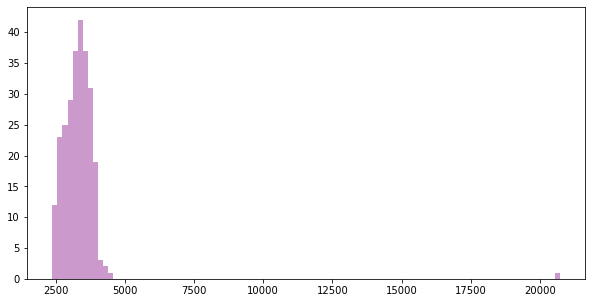

In [67]:
# Next up, let's have a closer look at the volume of some of these labels, do any look spurious?

# Loop through labels and compute volume 
hipp_volume = []

for x in label_paths:
    
    # Read in the label file
    temp_label = nib.load(x).get_fdata()
    
    # Compute the volume of hippocampus present and append
    temp_volume = np.sum(temp_label > 0)
    hipp_volume.append(temp_volume) 

# Display volume values as a frequency histogram.
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.hist(hipp_volume, bins=100, color='purple', alpha=0.4);

From the plot above it's clear we have at least a few outliers. Before we get nuanced, let's remove the obvious stuff: there is a _very_ high volume in here. Drop and update lists.



In [68]:
# First, let's find which file we're dealing with here
for x in label_paths:
    
    # Read in the label file
    temp_label = nib.load(x).get_fdata()
    
    # Compute the volume of hippocampus present and append
    temp_volume = np.sum(temp_label > 0)
    
    if temp_volume > 5000:
        print(x)
        print(temp_volume)

/data/TrainingSet/labels/hippocampus_281.nii.gz
20702


In [69]:
# Update the lists
drop_list, image_paths, label_paths = update_lists_with_drops("281", drop_list, image_paths, label_paths)

Adding 281 to the drop list
List dimensions before drops
Image list:  262
Label list:  262
List dimensions after drops
Image list:  261
Label list:  261


Having dropped the obvious outlier, let's revisit this loop and add control flow to apply some heuristics, based out prior understanding of 'expected' hippocampal volume.  

**Rules**
* Anything greater than 4650 (highest observed value across ages in the ~97th percentile)
* Anything less than 2850 (lowest observed value across ages in the ~2.5th percentile)

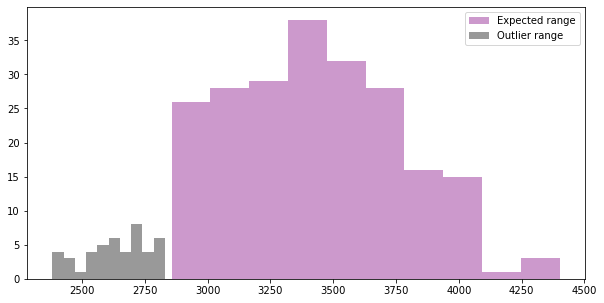

In [70]:
# Second run, with additional logic to evaluate outlier (identified on the basis of volume)
hipp_volume = []
outliers = []

for x in label_paths:
    
    # Read in the label file
    temp_label = nib.load(x).get_fdata()
    
    # Compute the volume of hippocampus present and append
    temp_volume = np.sum(temp_label > 0)
    
    if (temp_volume > 4650) or (temp_volume < 2850):
        outliers.append(temp_volume)
    
    else:
        hipp_volume.append(temp_volume) 

# Display volume values as a frequency histogram.
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.hist(hipp_volume, color='purple', alpha=0.4, label='Expected range');
plt.hist(outliers, color='black', alpha=0.4, label='Outlier range');
plt.legend()

I'm fairly satisfied with the theoretical foundation for these cuts, but the _amount_ being cut here is
rather severe. Let's take a closer look at what this would mean

In [71]:
# I'm fairly satisfied with the theoretical foundation for these cuts, but the _amount_ being cut here is
# rather severe. Let's take a closer look at what this would mean
print('Count outliers: ', len(outliers))
print('Count expected range: ', len(hipp_volume))

Count outliers:  45
Count expected range:  216


So, I think these cuts are too much -- particularly on the lower end.  

Based on the exercise above, we were instructed to expect volumes between `~2200 and ~4500`. Let's role with that and see what we get.

Count outliers:  0
Count expected range:  261


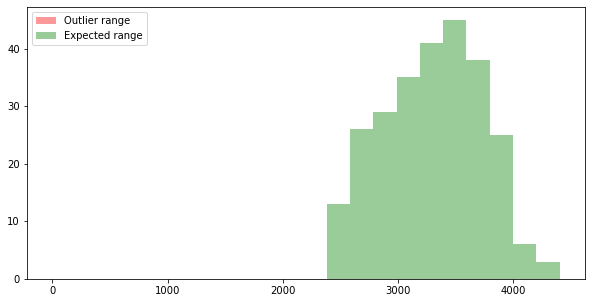

In [72]:
# Updated outlier definitions
hipp_volume = []
outliers = []

for x in label_paths:
    
    # Read in the label file
    temp_label = nib.load(x).get_fdata()
    
    # Compute the volume of hippocampus present and append
    temp_volume = np.sum(temp_label > 0)
    
    if (temp_volume > 4500) or (temp_volume < 2200):
        outliers.append(temp_volume)
    
    else:
        hipp_volume.append(temp_volume) 

print('Count outliers: ', len(outliers))
print('Count expected range: ', len(hipp_volume))
        
# Display volume values as a frequency histogram.
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.hist(outliers, color='red', alpha=0.4, label='Outlier range');
plt.hist(hipp_volume, color='green', alpha=0.4, label='Expected range');
plt.legend()

Thus far we have only looked at label files. Let's have a quick review of the image files.

In [73]:
# This is going to be a simplification of some background analysis, but it would appear that there is one 
# case where the dimensions of the image do not correspond with the dimensions of the image.

for i, x in enumerate(image_paths):
    
    # Read in the label file
    temp_image = nib.load(x).get_fdata()
    temp_label = nib.load(label_paths[i]).get_fdata()
    
    if temp_image.size != temp_label.size:
        print(temp_image.size)
        print(temp_label.size)
        print(x)

63176704
55800
/data/TrainingSet/images/hippocampus_010.nii.gz


In [74]:
# Adding file code 10 to the drop list and removeing
# Update the lists
drop_list, image_paths, label_paths = update_lists_with_drops("010", drop_list, image_paths, label_paths)

Adding 010 to the drop list
List dimensions before drops
Image list:  261
Label list:  261
List dimensions after drops
Image list:  260
Label list:  260


In [75]:
# Quick review of the drop list
drop_list

['118', '281', '010']

In [76]:
# Sanity test to ensure that there are matching image-and-label files in each list
set([x.split('_')[1] for x in image_paths]) ^ set([x.split('_')[1] for x in label_paths])

set()

In [77]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section

# Before we do this, it looks as though we have some additional information
!cat ./out/README.md

# Expected results

Please put the artefacts from Section 1 here:  
  
* Curated dataset with labels, as collection of NIFTI files. If you correctly identified the misfits you should have 260 images and 260 labels.
* A Python Notebook with the results of your Exploratory Data Analysis. If you prefer to do it in raw Python file, that is also acceptable - in that case put the `.py` file there, making sure that you copy Task descriptions from the notebook into your comments.


In [78]:
# Confirming (even though we've done this above)
print(len(label_paths), len(image_paths))

# We're good. Let's move the files

260 260


In [79]:
# Create the output directories
if not os.path.exists('/home/workspace/out/labels/'):
    os.makedirs('/home/workspace/out/labels/')

# Move label files
for x in label_paths:
    copyfile(x, '/home/workspace/out/labels/' + x.split("/")[-1])    

!ls ./out/labels/ | wc -l # Good

260


In [80]:
# Again, for images
if not os.path.exists('/home/workspace/out/images/'):
    os.makedirs('/home/workspace/out/images/')

for x in image_paths:
    copyfile(x, '/home/workspace/out/images/' + x.split("/")[-1])
                
!ls ./out/images/ | wc -l # Good

260


## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!